# Algoritmos de búsqueda en grafos

Hemos definido el problema de búsqueda de caminos en un laberinto como encontrar un camino entre dos nodos cualesquiera del grafo, en caso de existir ese camino.

Este no es un problema nuevo para la computación, de hecho el algoritmo que le da solución y que lleva el nombre de su inventor, fue descubierto en 1956.

## Dijkstra

El algoritmo de dijkstra es un algoritmo que determijna camino más corto, dado un vértice origen, hacia el resto de los vértices en un grafo con pesos.

La idea es partir del nodo de origen y explorar recusivamente los caminos mínimos al resto de nodos, guardando y actualizando la información de forma continua en memoria.

```bash
ALGORITMO Dijkstra(Grafo G, Nodo origen)
    INICIALIZAR distancia[nodos de G] a infinito
    INICIALIZAR visto[nodos de G] a falso
    DISTANCIA[origen] = 0

    MIENTRAS existan nodos no vistos HACER
        nodo_actual = nodo no visto con menor valor en DISTANCIA
        visto[nodo_actual] = verdadero

        PARA CADA vecino DE nodo_actual HACER
            SI visto[vecino] es falso ENTONCES
                distancia_tentativa = DISTANCIA[nodo_actual] + peso(nodo_actual, vecino)
                SI distancia_tentativa < DISTANCIA[vecino] ENTONCES
                    DISTANCIA[vecino] = distancia_tentativa
                FIN SI
            FIN SI
        FIN PARA
    FIN MIENTRAS
FIN ALGORITMO
```

<video src="out.mp4" width="320" height="240" controls></video>

In [ ]:
from heapq import heappush, heappop             # colas de prioridad
import networkx as nx
import numpy as np

In [1]:
from maze import Maze
m = Maze(10)                                    ## RANDOM SEED NOT SET ON MAZE GENERATION ### 

In [2]:

def dijkstra(grafo, start):
    distancias = {}
    caminos = {}
    padres = {}
    vistos = set()
    queue = []
    for n in grafo.nodes:
        distancias[n] = float('inf')
        padres[n]     = None
        caminos[n]    = []
    distancias[start] = 0
    caminos[start] = [start]
    heappush(queue, (distancias[start], start))

    while queue:
        dist_actual, nodo_actual = heappop(queue)
        vistos.add(nodo_actual)
        if dist_actual > distancias[nodo_actual]:
            continue

        for ady in list(grafo.neighbors(nodo_actual)):
            if ady not in vistos:
                nueva_dist = distancias[nodo_actual] + grafo[nodo_actual][ady].get('weight', 1)
                if nueva_dist < distancias[ady]:
                    distancias[ady] = nueva_dist
                    padres[ady] = nodo_actual
                    caminos[ady] = caminos[nodo_actual] + [ady]
                    heappush(queue, (distancias[ady], ady))
    return distancias, caminos

In [3]:
# DIJKSTRA
distancias, caminos = dijkstra(m.grid,m.start)
caminos[m.end]

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 2),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (7, 8),
 (8, 8),
 (9, 8),
 (9, 9)]

## Visualización de resultados - Animación con pyvis

In [4]:
from pyvis.network import Network

def dijkstra_animado_con_pyvis(G):
    start, end = G.start, G.end
    visitados = set()
    distancias = {nodo: float('inf') for nodo in G.grid.nodes()}
    distancias[start] = 0
    cola = [(0, start)]

    while cola:
        _, nodo_actual = heappop(cola)
        if nodo_actual in visitados:
            continue
        visitados.add(nodo_actual)

        visualizar_grafo_con_pyvis(G.grid, visitados, start, end, f"frames/dijkstra_{len(visitados)}.html")

        if nodo_actual == end:
            break

        for vecino in G.grid.neighbors(nodo_actual):
            nueva_dist = distancias[nodo_actual] + 1  # Asumiendo un peso de 1 para cada arista
            if nueva_dist < distancias[vecino]:
                distancias[vecino] = nueva_dist
                heappush(cola, (nueva_dist, vecino))

def visualizar_grafo_con_pyvis(G, visitados, start, end, filename):
    nt = Network(notebook=True, width="100%", height="700px")
    for node in G.nodes:
        x, y = node
        nt.add_node(str(node), title=str(node), x=x*100, y=-y*100, color="lightgray" if node not in visitados else "skyblue", fixed=True)

    for edge in G.edges:
        nt.add_edge(str(edge[0]), str(edge[1]))

    nt.get_node(str(start))["color"] = "green"
    nt.get_node(str(end))["color"] = "red"
    nt.toggle_physics(False)
    nt.show(filename)

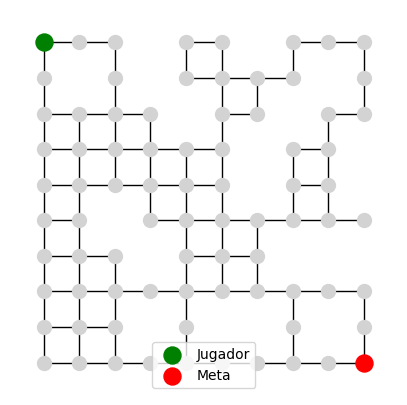

frames/dijkstra_1.html
frames/dijkstra_2.html
frames/dijkstra_3.html
frames/dijkstra_4.html
frames/dijkstra_5.html
frames/dijkstra_6.html
frames/dijkstra_7.html
frames/dijkstra_8.html
frames/dijkstra_9.html
frames/dijkstra_10.html
frames/dijkstra_11.html
frames/dijkstra_12.html
frames/dijkstra_13.html
frames/dijkstra_14.html
frames/dijkstra_15.html
frames/dijkstra_16.html
frames/dijkstra_17.html
frames/dijkstra_18.html
frames/dijkstra_19.html
frames/dijkstra_20.html
frames/dijkstra_21.html
frames/dijkstra_22.html
frames/dijkstra_23.html
frames/dijkstra_24.html
frames/dijkstra_25.html
frames/dijkstra_26.html
frames/dijkstra_27.html
frames/dijkstra_28.html
frames/dijkstra_29.html
frames/dijkstra_30.html
frames/dijkstra_31.html
frames/dijkstra_32.html
frames/dijkstra_33.html
frames/dijkstra_34.html
frames/dijkstra_35.html
frames/dijkstra_36.html
frames/dijkstra_37.html
frames/dijkstra_38.html
frames/dijkstra_39.html
frames/dijkstra_40.html
frames/dijkstra_41.html
frames/dijkstra_42.html
f

In [5]:
# Ejecutar la animación de Dijkstra
m = Maze(10)                                        ## RANDOM SEED NOT SET ON MAZE GENERATION ### 
m.display()
dijkstra_animado_con_pyvis(m)

¿Cómo visualizar la animación? Después de ejecutar el comando anterior, se habran creado archivos html dentro de frames. Ahora tenemos ejecutar html_to_images.js para renderizar el javascript, realizar una captura de pantalla de cada html, y convertirlo todo después a vídeo.

1. Convertir los html a imanes
```bash
node html_to_images.js
```

2. Convertir las imagenes a un vídeo secuencial, donde cada frame dura 1s 
```bash
ffmpeg -framerate 1 -pattern_type glob -i 'temp_images/capture_dijkstra_*.png' -c:v libx264 -r 30 -pix_fmt yuv420p out.mp4
``````

In [ ]:
from IPython.display import Video

## RANDOM SEED NOT SET ON MAZE GENERATION ### 
Video("out.mp4")

# A*

In [ ]:
# Función heurística para el algoritmo A*
def manhattan(s,e):
  dmin = min(abs(s[0]-e[0]), abs(s[1]-e[1])) 
  dmax = max(abs(s[0]-e[0]), abs(s[1]-e[1])) 
  return dmin + (dmax-dmin)